In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import config

In [15]:
trips = pd.read_csv(config.TRIPS_1216_PRC, low_memory=False)
trips.shape

(44351, 18)

In [16]:
trips.head()

,TRIPID,PERSID,HHID,TRIPNO,TRAVDOW,LINKMODE,TRIPPURP,DESTPURP1,STARTIME,ARRTIME,TRIPTIME,TRAVTIME,WAITIME,ORIGSA1,DESTSA1,CUMDIST,HomeSA1,Mode
0,Y12H0000107P01T01,Y12H0000107P01,Y12H0000107,1,Sunday,Vehicle Driver,Social,Social,630,650,20,20,0,20904122028,20904122002,2.60,20904122028,Car
1,Y12H0000107P01T02,Y12H0000107P01,Y12H0000107,2,Sunday,Vehicle Driver,Social,At or Go Home,750,760,10,10,0,20904122002,20904122028,2.60,20904122028,Car
2,Y12H0000107P01T03,Y12H0000107P01,Y12H0000107,3,Sunday,Walking,Recreational,Recreational,810,840,30,30,0,20904122028,20904122031,3.23,20904122028,Walk
3,Y12H0000107P01T04,Y12H0000107P01,Y12H0000107,4,Sunday,Walking,Recreational,At or Go Home,855,885,30,30,0,20904122031,20904122028,3.23,20904122028,Walk
4,Y12H0000107P02T01,Y12H0000107P02,Y12H0000107,1,Sunday,Vehicle Passenger,Social,Social,630,650,20,20,0,20904122028,20904122002,2.60,20904122028,Car


In [17]:
trips['Mode'].value_counts()

Walk     20277
Car      19823
Train     2171
Cycle     2080
Name: Mode, dtype: int64

### Trip distance by mode

In [18]:
trips.groupby(['Mode']).CUMDIST.describe()

,count,mean,std,min,25%,50%,75%,max
Mode,,,,,,,,
Car,19823.0,9.703360,17.038146,0.000000,2.070000,4.530000,10.821255,475.290000
Cycle,2080.0,4.809332,5.609853,0.050000,1.328027,2.920000,6.353000,60.548000
Train,2171.0,16.652811,16.228106,0.492057,6.024000,12.007369,21.792102,143.696153
Walk,20277.0,1.059256,1.107554,0.000000,0.439000,0.830000,1.390000,58.150000


Mode
Car      AxesSubplot(0.125,0.125;0.775x0.755)
Cycle    AxesSubplot(0.125,0.125;0.775x0.755)
Train    AxesSubplot(0.125,0.125;0.775x0.755)
Walk     AxesSubplot(0.125,0.125;0.775x0.755)
Name: CUMDIST, dtype: object

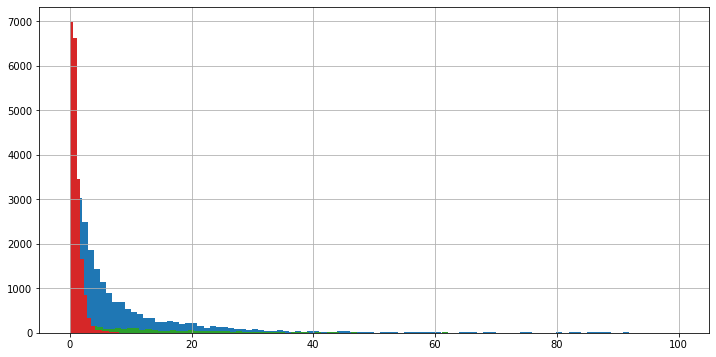

In [19]:
trips[trips.CUMDIST < 100].groupby(['Mode']).CUMDIST.hist(bins=100, figsize=(12,6))

### Trip travel time by mode

In [20]:
trips.groupby(['Mode']).TRAVTIME.describe()

,count,mean,std,min,25%,50%,75%,max
Mode,,,,,,,,
Car,19823.0,20.026182,20.003503,1.0,10.0,15.0,25.0,465.0
Cycle,2080.0,25.083173,22.625765,1.0,10.0,20.0,30.0,270.0
Train,2171.0,47.811147,23.976319,5.0,30.0,45.0,60.0,302.0
Walk,20277.0,14.690783,12.378443,1.0,5.0,12.0,20.0,375.0


Mode
Car      AxesSubplot(0.125,0.125;0.775x0.755)
Cycle    AxesSubplot(0.125,0.125;0.775x0.755)
Train    AxesSubplot(0.125,0.125;0.775x0.755)
Walk     AxesSubplot(0.125,0.125;0.775x0.755)
Name: TRAVTIME, dtype: object

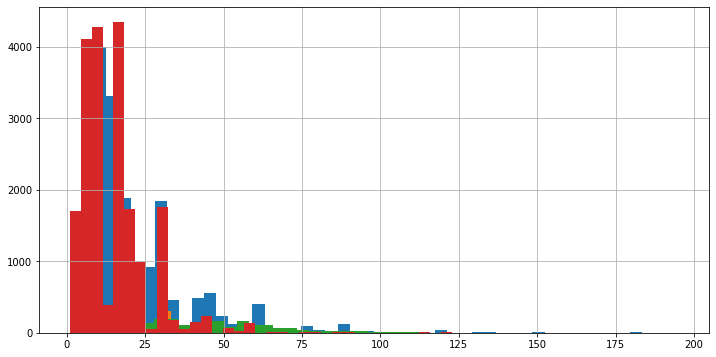

In [21]:
trips[trips.TRAVTIME < 200].groupby(['Mode']).TRAVTIME.hist(bins=50, figsize=(12,6))

### Trip speed km/h by mode (distance/trip_time)

In [22]:
trips["SPEED"] = 60 * trips["CUMDIST"] / trips["TRIPTIME"]

In [23]:
trips.groupby("Mode").SPEED.describe()

,count,mean,std,min,25%,50%,75%,max
Mode,,,,,,,,
Car,19823.0,24.673838,15.590503,0.0000,13.512000,21.240000,31.864248,147.375664
Cycle,2080.0,11.140350,6.010116,0.1220,6.499789,10.470000,14.730000,44.142857
Train,2171.0,15.932769,9.271137,1.3564,9.050065,14.273319,20.820766,95.508000
Walk,20277.0,4.817145,3.240588,0.0000,2.934830,4.240087,5.600000,46.800000


In [24]:
trips.groupby("Mode")["TRAVTIME", "CUMDIST"].describe().T

/home/danph/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Mode                     Car        Cycle        Train          Walk
TRAVTIME count  19823.000000  2080.000000  2171.000000  20277.000000
         mean      20.026182    25.083173    47.811147     14.690783
         std       20.003503    22.625765    23.976319     12.378443
         min        1.000000     1.000000     5.000000      1.000000
         25%       10.000000    10.000000    30.000000      5.000000
         50%       15.000000    20.000000    45.000000     12.000000
         75%       25.000000    30.000000    60.000000     20.000000
         max      465.000000   270.000000   302.000000    375.000000
CUMDIST  count  19823.000000  2080.000000  2171.000000  20277.000000
         mean       9.703360     4.809332    16.652811      1.059256
         std       17.038146     5.609853    16.228106      1.107554
         min        0.000000     0.050000     0.492057      0.000000
         25%        2.070000     1.328027     6.024000      0.439000
         50%        4.530000     2.920000    12.007369      0.830000
         75%       10.821255     6.353000    21.792102      1.390000
         max      475.290000    60.548000   143.696153     58.150000

In [25]:
trips.groupby(["Mode", "TRIPPURP"]).TRIPID.count()

Mode   TRIPPURP         
Car    Education             707
       Other                 245
       Personal Business    1425
       Pick-up_Drop-off     4345
       Recreational         1428
       Shopping             4430
       Social               3672
       Work                 3571
Cycle  Education             241
       Other                  17
       Personal Business      66
       Pick-up_Drop-off      171
       Recreational          622
       Shopping              185
       Social                244
       Work                  534
Train  Education             127
       Other                  29
       Personal Business      92
       Pick-up_Drop-off       97
       Recreational           74
       Shopping              273
       Social                454
       Work                 1025
Walk   Education            1459
       Other                 131
       Personal Business    4291
       Pick-up_Drop-off     1984
       Recreational         4741
       Shopping   